# WordCloud

In [ ]:
# !pip install konlpy
import re
import konlpy
import pandas as pd

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 53.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-1학기/5강 시각화/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [ ]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [ ]:
#나눔 폰트 업로드
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [126]:
import matplotlib.pyplot as plt


FONT_PATH = '/content/drive/MyDrive/코드/코드/폰트/나눔 글꼴/나눔바른고딕/NanumBarunGothic.ttf' 

font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [ ]:
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [124]:
wordcloud = WordCloud(
    max_font_size=100, 
    width=500,
    height=500,
    font_path=path,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='black')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

SyntaxError: ignored

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-1학기/5강 시각화/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [ ]:
import datetime

# train['datetime'] 데이터 형식 날짜 형식으로 변환 
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train['year'] = train['datetime'].dt.year         # 연(4자리숫자)
train['month'] = train['datetime'].dt.month        # 월(숫자)
train['day'] = train['datetime'].dt.day        # 일(숫자)

train['hour'] = train['datetime'].dt.hour         # 시(숫자)
train['minute'] = train['datetime'].dt.minute       # 분(숫자)
train['second'] = train['datetime'].dt.second       # 초(숫자)
train['day_name'] = train['datetime'].dt.day_name() # 요일

train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

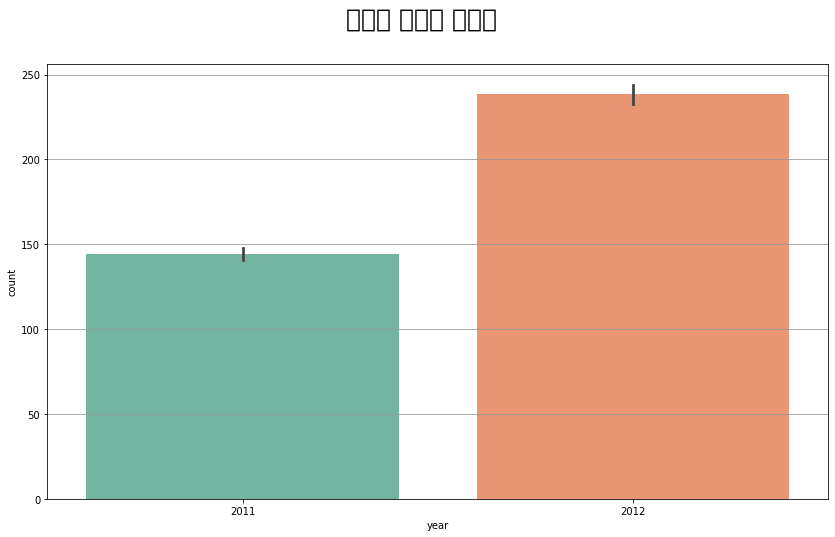

In [111]:
# 연도별 자전거 대여량 
plt.figure(figsize=(14,8))
plt.suptitle('연도별 자전거 대여량 ', size = 25)
sns.barplot(x="year",y="count", data=train, palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

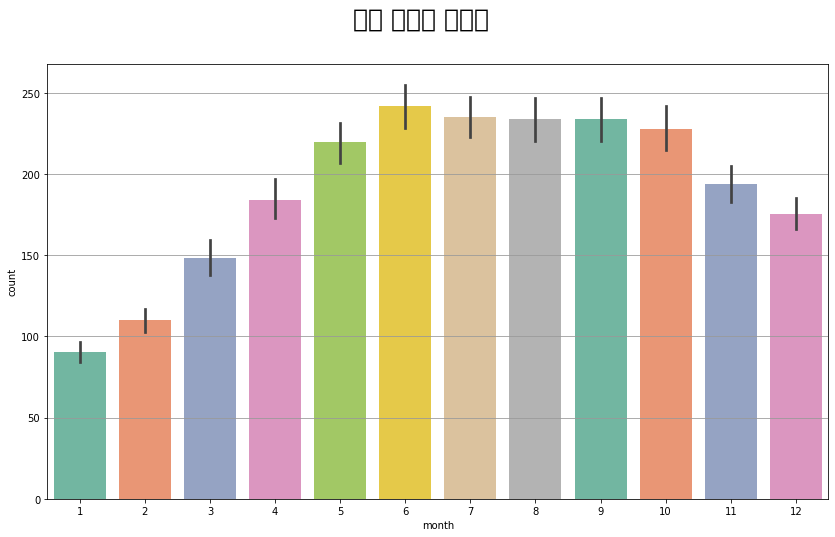

In [ ]:
# 월별 자전거 대여량 
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('월별 자전거 대여량 ', size = 25)
sns.barplot(x="month",y="count", data=train, palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [ ]:
train['year_month'] = train['year'].astype('string') +"_" + train['month'].astype('string')
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_name,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,2011_1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,2011_1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,2011_1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

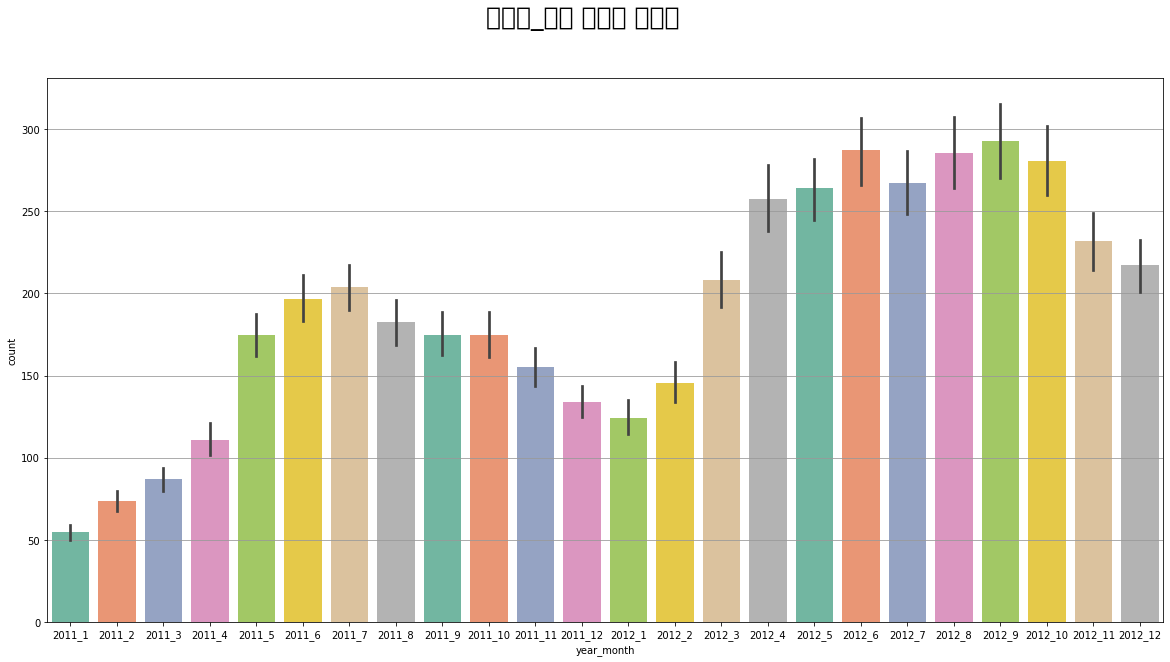

In [ ]:
# 연도별 월별 자전거 대여량 
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
plt.suptitle('연도별_월별 자전거 대여량 ', size = 25)
sns.barplot(x="year_month",y="count", data=train, palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

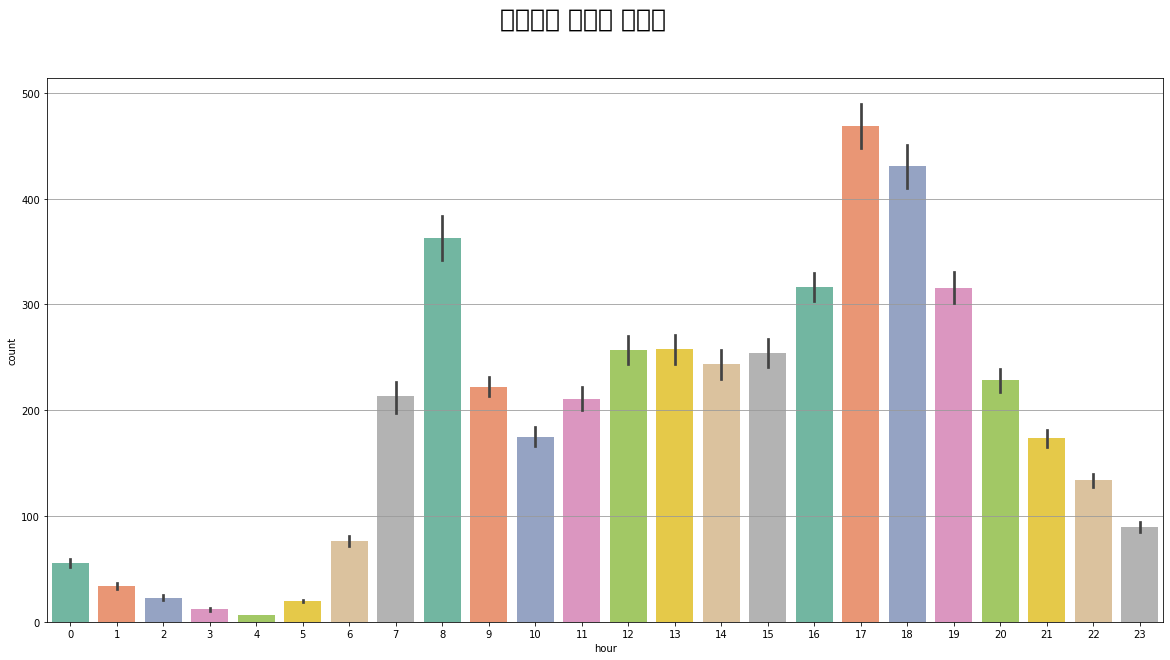

In [112]:
# 시간대별 월별 자전거 대여량 
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
plt.suptitle('시간대별 자전거 대여량 ', size = 25)
sns.barplot(x="hour",y="count", data=train, palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

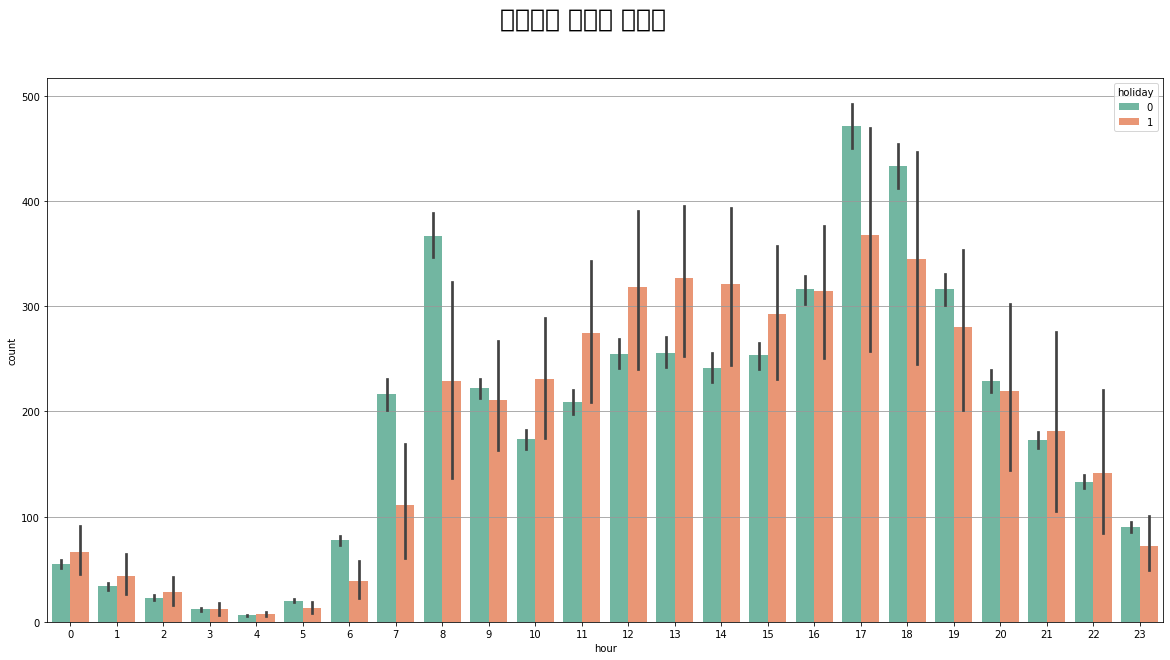

In [113]:
# 시간대별 자전거 대여량 - holiday 구분
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
plt.suptitle('시간대별 자전거 대여량 ', size = 25)
sns.barplot(x="hour",y="count", data=train, palette='Set2',hue = 'holiday')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

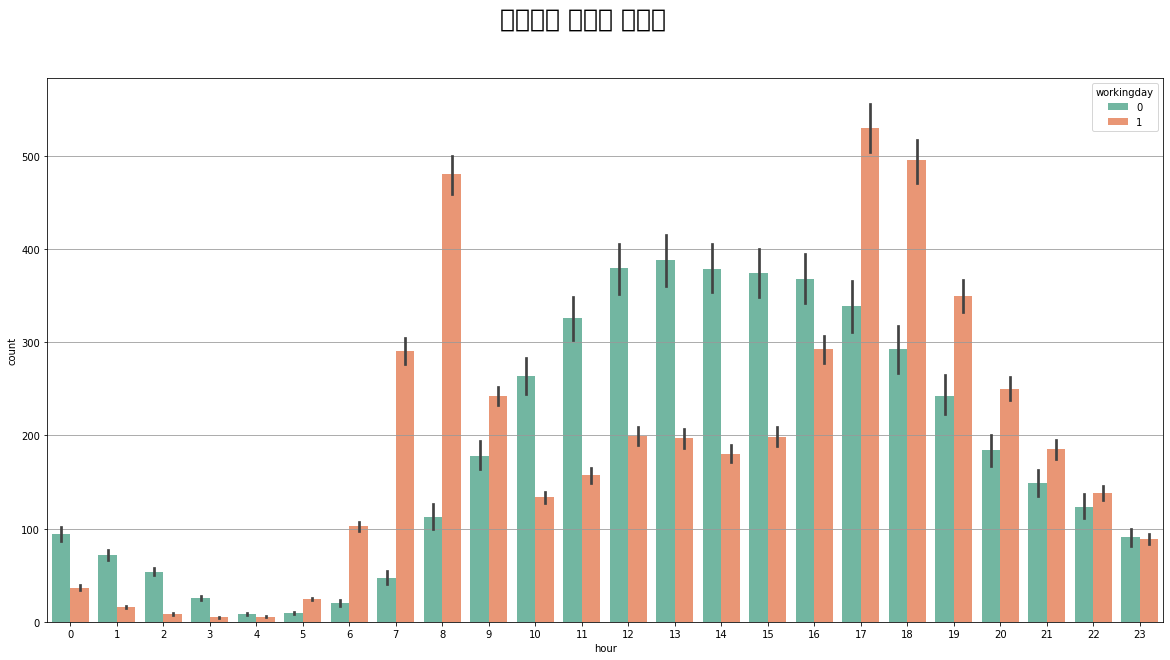

In [114]:
# 시간대별 자전거 대여량 - workingday 구분
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
plt.suptitle('시간대별 자전거 대여량 ', size = 25)
sns.barplot(x="hour",y="count", data=train, palette='Set2',hue = 'workingday')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

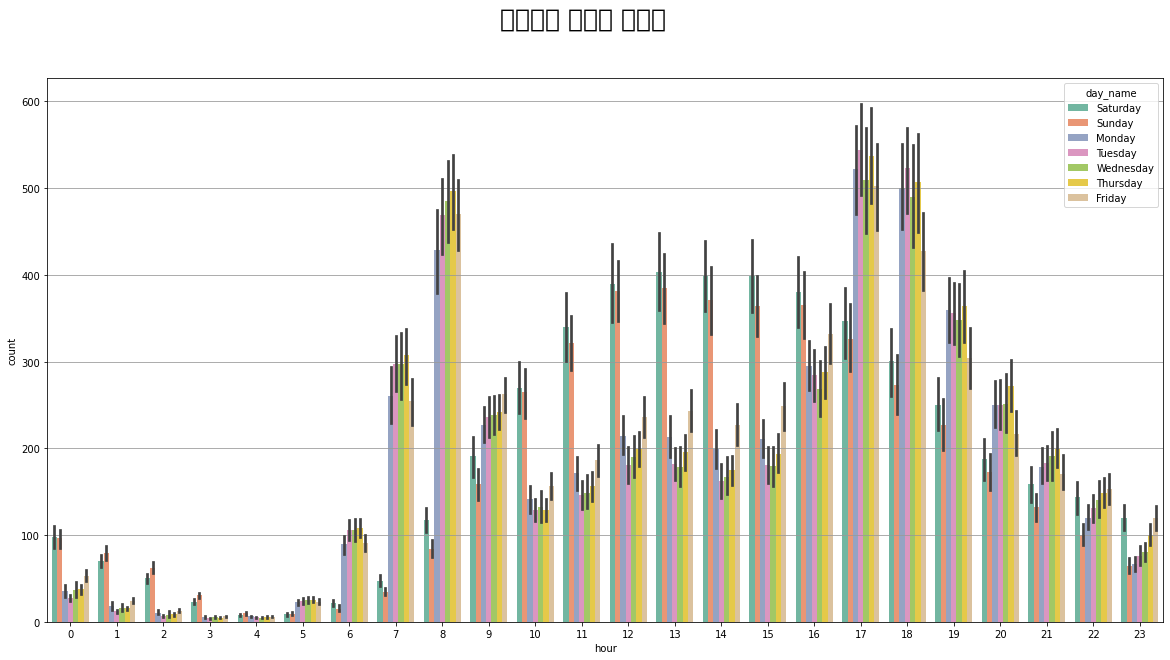

In [115]:
# 시간대별 자전거 대여량 - 요일 구분
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,10))
plt.suptitle('시간대별 자전거 대여량 ', size = 25)
sns.barplot(x="hour",y="count", data=train, palette='Set2',hue = 'day_name')
plt.grid(b=True, color='#999999',axis='y')
plt.show()

### pointplot..?

In [ ]:
train_dayName_hour = train.groupby(['day_name', 'hour'])['count'].mean()
train_dayName_hour

day_name   hour
Friday     0        53.234375
           1        24.453125
           2        12.531250
           3         6.322581
           4         5.932203
                      ...    
Wednesday  19      348.230769
           20      251.569231
           21      190.661538
           22      140.400000
           23       80.138462
Name: count, Length: 168, dtype: float64

In [ ]:
train_dayName_hour_df = pd.DataFrame(train_dayName_hour)
train_dayName_hour_df2 = train_dayName_hour_df.reset_index()
train_dayName_hour_df2

,day_name,hour,count
0,Friday,0,53.234375
1,Friday,1,24.453125
2,Friday,2,12.531250
3,Friday,3,6.322581
4,Friday,4,5.932203
...,...,...,...
163,Wednesday,19,348.230769
164,Wednesday,20,251.569231
165,Wednesday,21,190.661538
166,Wednesday,22,140.400000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

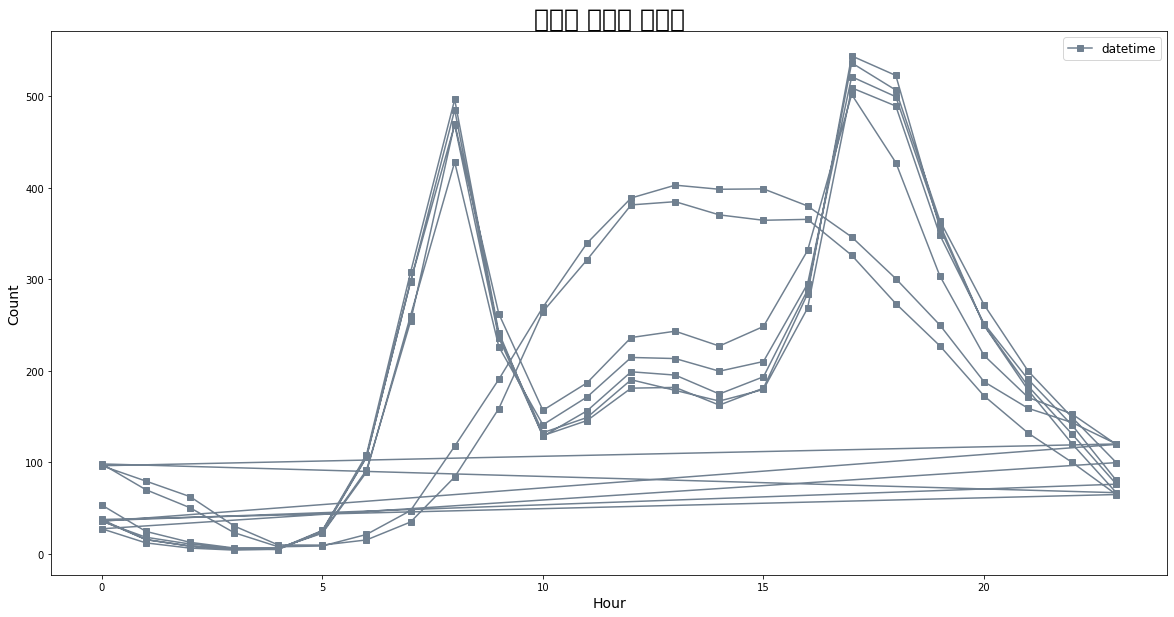

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_dayName_hour_df2['hour'], train_dayName_hour_df2['count'], marker='s', color='slategray') 
plt.title('시간별 자전거 대여량', fontsize=25) 
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.legend(train.columns, fontsize=12, loc = 'best') # loc=0,  loc='best'
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_

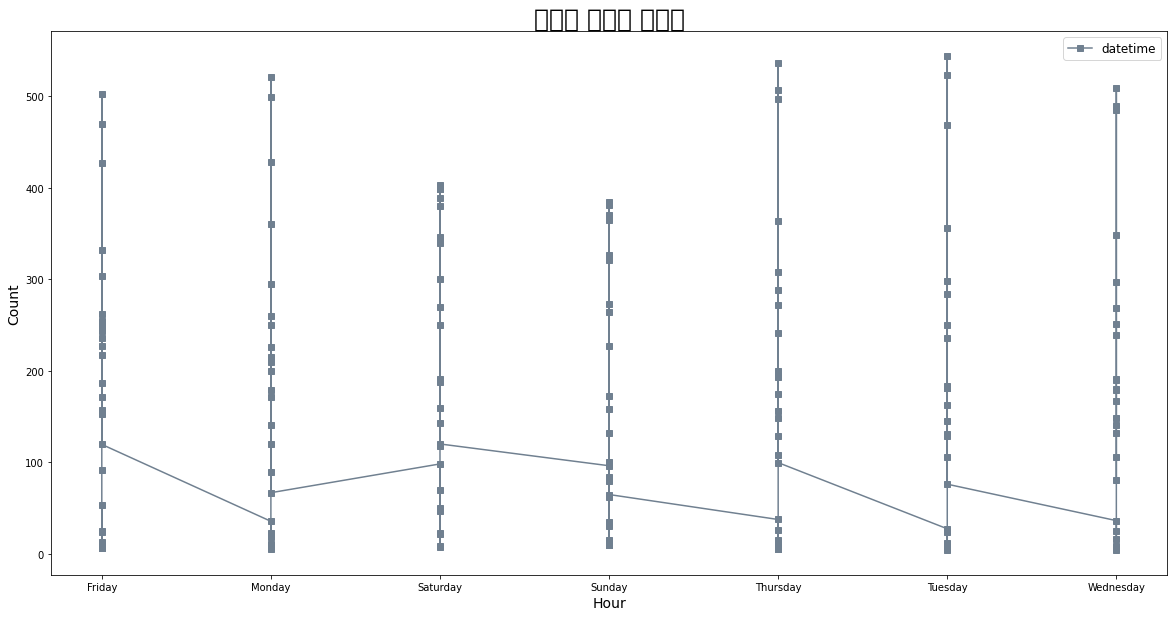

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_dayName_hour_df2['day_name'], train_dayName_hour_df2['count'], marker='s', color='slategray') 
plt.title('시간별 자전거 대여량', fontsize=25) 
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.legend(train.columns, fontsize=12, loc = 'best') # loc=0,  loc='best'
plt.show()

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [116]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

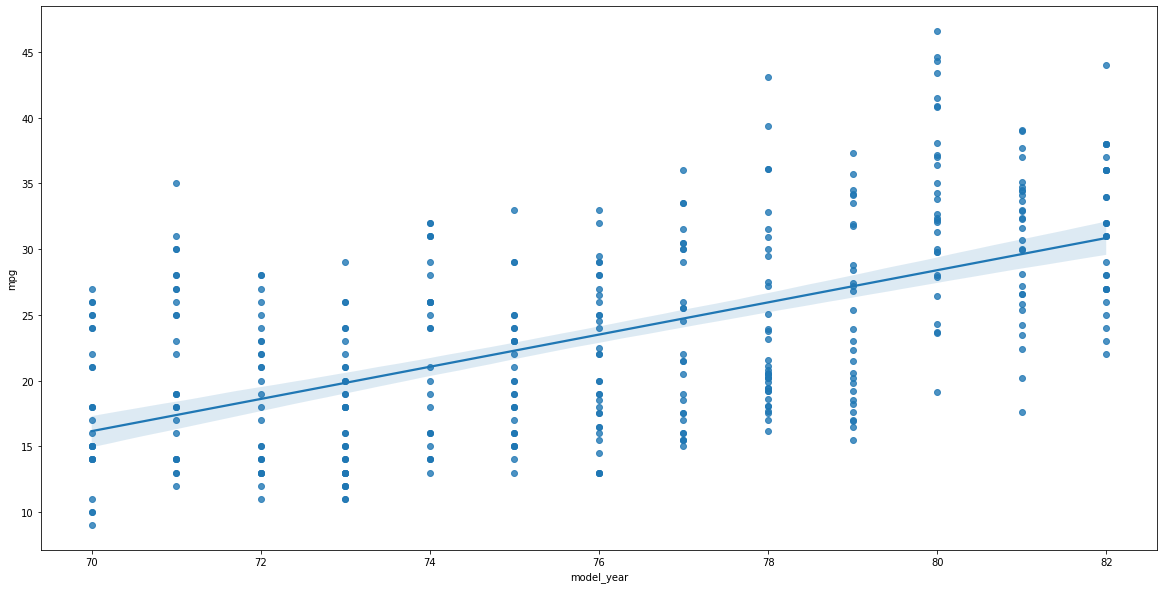

In [118]:
# 회귀 그래프
plt.figure(figsize=(20,10))
sns.regplot(data = mpg, x = 'model_year', y = 'mpg')
plt.show()

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
